<a href="https://colab.research.google.com/github/lili-codelab/comp-linguistics/blob/main/convnet_hw_li_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание: бинарная классификация отзывов с помощью CNN

Применить CNN для анализа тональности текста (положительный/отрицательный отзыв)

Заполните пропущенный код (`### ВАШ КОД ЗДЕСЬ ###`). **Не меняйте структуру ячеек!** Все ответы и графики должны генерироваться автоматически

**Критерии проверки (максимум 10 баллов):**
*   **2 балла** — корректная загрузка и предобработка данных.
*   **3 балла** — корректно собранная модель по спецификации.
*   **2 балла** — успешное обучение модели (вывод истории обучения).
*   **3 балла** — оценка на тесте и выводы (accuracy > 0.85 даёт +1 балл).

---

## БЛОК 1: Загрузка данных

Тренировочные данные: 25000 samples
Тестовые данные: 25000 samples


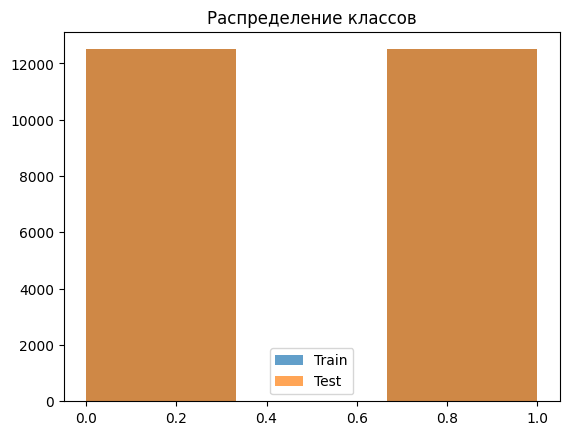

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# 1. Загрузите датасет IMDB Reviews (бинарная классификация)
(train_dataset, test_dataset), info = tfds.load('imdb_reviews',
                                                split=['train', 'test'],
                                                as_supervised=True,
                                                with_info=True)
x_train, y_train = [], []
x_test, y_test = [], []

for text, label in train_dataset:
    x_train.append(text.numpy().decode('utf-8'))
    y_train.append(label.numpy())

for text, label in test_dataset:
    x_test.append(text.numpy().decode('utf-8'))
    y_test.append(label.numpy())

x_train = np.array(x_train, dtype=object)
y_train = np.array(y_train)
x_test = np.array(x_test, dtype=object)
y_test = np.array(y_test)

# Используйте tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
# Преобразуйте данные в numpy массивы (x_train, y_train), (x_test, y_test)

print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")

# 2. Визуализируйте распределение классов
plt.hist(y_train, bins=3, alpha=0.7, label='Train')
plt.hist(y_test, bins=3, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение классов')
plt.show()

## БЛОК 2: Предобработка текста

In [16]:
# 3. Создайте текстовый векторзатор (TextVectorization)
# Ограничьте словарь 10_000 самых частых слов, максимальную длину последовательности — 200 слов
vectorizer = keras.layers.TextVectorization(max_tokens=10000,
                                            output_sequence_length=200)

# 4. Адаптируйте векторзатор на тренировочных текстах
vectorizer.adapt(x_train)

# 5. Примените векторзацию к данным
x_train_vec = vectorizer(x_train).numpy()
x_test_vec = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")

Размерность после векторизации: (25000, 200)


## БЛОК 3: Построение модели

In [17]:
# 6. Постройте модель CNN для текста СТРОГО ПО СПЕЦИФИКАЦИИ:
#    - Вход: векторная последовательность (200,)
#    - Embedding: размерность 128, входной словарь 10_000
#    - Conv1D: 64 фильтра, размер ядра 5, активация 'relu'
#    - GlobalMaxPooling1D
#    - Dense: 32 нейрона, 'relu'
#    - Dense: 1 нейрон, 'sigmoid' (бинарная классификация)
model = keras.Sequential([
    keras.layers.Input(shape=(200,)),
    keras.layers.Embedding(input_dim=10000, output_dim=128),
    keras.layers.Conv1D(64, 5, activation='relu'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 196, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,137 (5.05 MB)

 Trainable params: 1,323,137 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

## БЛОК 4: Обучение

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.7024 - loss: 0.5471 - precision: 0.6754 - recall: 0.7528 - val_accuracy: 0.8600 - val_loss: 0.3200 - val_precision: 0.8678 - val_recall: 0.8534
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.9307 - loss: 0.1890 - precision: 0.9287 - recall: 0.9323 - val_accuracy: 0.8678 - val_loss: 0.3201 - val_precision: 0.8731 - val_recall: 0.8645
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9908 - loss: 0.0450 - precision: 0.9907 - recall: 0.9907 - val_accuracy: 0.8712 - val_loss: 0.3873 - val_precision: 0.8891 - val_recall: 0.8518
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9997 - loss: 0.0061 - precision: 1.0000 - recall: 0.9995 - val_accuracy: 0.8732 - val_loss: 0.4422 - val_precision: 0.8783 - val_recall: 0.8700
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 1.0000 - loss: 9.6133e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.8742 - val

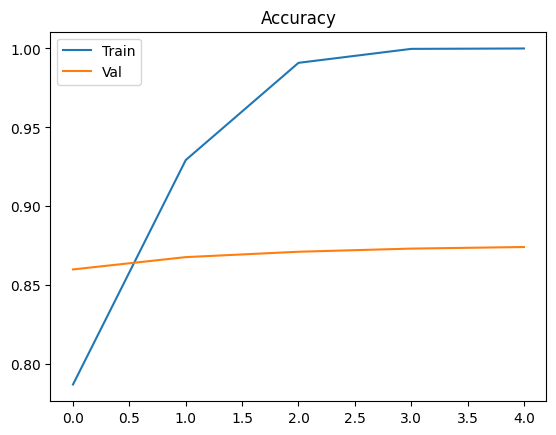

In [19]:
# 7. Скомпилируйте модель с оптимизатором 'adam', функцией потерь 'binary_crossentropy',
#    метриками ['accuracy', 'Precision', 'Recall']
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

# 8. Обучите модель на 5 эпох с validation_split=0.2, batch_size=32
history = model.fit(x_train_vec, y_train,
                    epochs=5,
                    validation_split=0.2,
                    batch_size=32,
                    verbose=1)

# 9. Постройте график точности (accuracy) на обучении и валидации
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.show()

## БЛОК 5: Оценка

In [20]:
# 10. Оцените модель на тестовых данных
### ВАШ КОД ЗДЕСЬ ###
test_loss, test_acc, test_prec, test_rec = model.evaluate(x_test_vec, y_test, verbose=0)

print(f"Тестовая accuracy: {test_acc:.4f}")
print(f"Тестовая precision: {test_prec:.4f}")
print(f"Тестовая recall: {test_rec:.4f}")

# 11. Сделайте предсказания на первых 10 тестовых отзывах
#     и выведите: текст отзыва, истинный класс, предсказанный класс, вероятность
for i in range(10):
    text = x_test[i]
    true_label = "POS" if y_test[i] == 1 else "NEG"
    pred_prob = model.predict(x_test_vec[i:i+1], verbose=0)
    pred_label = "POS" if pred_prob[0][0] > 0.5 else "NEG"

    print(f"{text[:50]}... | True: {true_label} | Pred: {pred_label} ({pred_prob[0][0]:.2f})")

Тестовая accuracy: 0.8663
Тестовая precision: 0.8691
Тестовая recall: 0.8626
There are films that make careers. For George Rome... | True: POS | Pred: POS (1.00)
A blackly comic tale of a down-trodden priest, Naz... | True: POS | Pred: POS (0.67)
Scary Movie 1-4, Epic Movie, Date Movie, Meet the ... | True: NEG | Pred: NEG (0.00)
Poor Shirley MacLaine tries hard to lend some grav... | True: NEG | Pred: NEG (0.00)
As a former Erasmus student I enjoyed this film ve... | True: POS | Pred: POS (1.00)
My God, Ryan Gosling has made a lot of deep charac... | True: POS | Pred: POS (1.00)
This film just won the best film award at the Clev... | True: POS | Pred: POS (1.00)
The cast for this production of Rigoletto is excel... | True: POS | Pred: POS (1.00)
As long as you keep in mind that the production of... | True: NEG | Pred: NEG (0.07)
Every great once in a while, you stumble upon a mo... | True: POS | Pred: NEG (0.01)


## БЛОК 6: Выводы

**Ответьте на вопросы в этой ячейке (текстом):**

1.  Какая итоговая точность (accuracy) на тесте?
2.  Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
3.  Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?

**Мои ответы:**
1. Тестовая accuracy: 0.8663
2. Разница между точностью на обучении (1.0000) и валидации (0.8742 - по данным последней эпохи) составляет примерно 12,6% и показывает , что переобучение есть, так как train_accuracy растёт до 100%, а val_accuracy не выходит дальше 87%. Модель, можно сказать, "выучила" тренировочные отзывы, но на новых возникают отлконения, "неточности", что, возможно, решаемо настройкой (регулировка кол-ва эпох или, как в практической - введение Dropout).
3. Последний отзыв:
> Every great once in a while, you stumble upon a mo... | True: POS | Pred: NEG (0.01)

Отзыв указан как позитивный, модель же указала как негативный. Возможно, в отзыве были отмечены слова с негативной окраской, которые ведут к негативной оценке моделью, однако сам отзыв не предполагает использование их прямого значения. Так как модель сравнивает с загруженными для обучения тренировочными вариантами, вероятно, что последний выпадает из клише, поэтому и оценивается как негативный из-за некоторых слов с негативной окраской.

